### Imports

In [137]:
import pandas as pd
import numpy as np
import math
import random
import geopandas as gpd
import geopy
from geopy.distance import distance, Distance, great_circle
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shapely
import pyproj

#### Global Variables

In [25]:
district_file_loc = '/Users/ernestvmo/OneDrive - Universiteit Leiden/Q1/Urban Computing/Project/data/ZIP_CODE_040114/ZIP_CODE_040114.shp'
zip_codes_shp = gpd.read_file(district_file_loc)

### 2012

In [263]:
file_loc_2012 = '/Users/ernestvmo/Downloads/2012.csv'

In [264]:
df_2012 = pd.read_csv(file_loc_2012)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,73,103,110,111) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [265]:
df_2012['sector']

0         C
1         D
2         C
3         J
4         J
         ..
532906    B
532907    B
532908    C
532909    C
532910    E
Name: sector, Length: 532911, dtype: object

In [266]:
df_2012.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2012,40,17,1012012,115,1,O,P,2.0,ROBBERY,...,,40,C,*,,1008031,233036,CM,1,85
1,2012,23,691,1012012,310,1,I,P,2.0,M,...,,23,D,,12,1000852,228179,CM,1,9
2,2012,81,3714,1012012,2000,1,O,P,1.0,ROBBERY,...,,81,C,3,,1001869,190702,CM,1,85
3,2012,81,633,1022012,1245,1,O,P,3.0,ROBBERY,...,,81,J,*,,1005306,186668,CM,1,85
4,2012,66,36,1042012,2220,A,O,P,2.0,FELONY,...,,66,J,,,986887,173599,CM,1,46


In [267]:
def format_date(dataframe, column):
    new_date = []
    format_date = '%d/%m/%Y'
    for fulldate in dataframe[column].values.astype('str'):
        year, fulldate = int(fulldate[-4:]), fulldate[:-4] 
        day, fulldate = int(fulldate[-2:]), fulldate[:-2] 
        month = int(fulldate[:])
        new_date.append(f'{day}/{month}/{year}')
    dataframe[column] = pd.to_datetime(new_date, format=format_date)
    return dataframe

In [268]:
new_df = format_date(df_2012, column='datestop')

### 311 dataset

In [269]:
file_loc_311 = '/Users/ernestvmo/OneDrive - Universiteit Leiden/Q1/Urban Computing/Project/data/311_Service_Requests_from_2010_to_Present.csv'

In [270]:
df_311 = pd.read_csv(file_loc_311)

KeyboardInterrupt: 

In [ ]:
zip_codes = []
count=0
for i in df_311['Incident Zip'].values:
    if isinstance(i,str):
        if i==nan:
        count+=1
    else:
        print(type(i))
    # if math.isnan(i)
    # zip_codes.append(int(i))
print(count, len(df_311['Incident Zip'].values))
# np.where(df_311['Incident Zip'].values )
# len(np.unique(df_311['Incident Zip'].values.astype('int')))

In [ ]:
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,23525569,07/01/2012 12:00:00 AM,07/05/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,NONCONST,RUBBISH,RESIDENTIAL BUILDING,10454,226 WILLIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808520,-73.923296,"(40.80852004566505, -73.92329572996589)"
1,23530609,07/01/2012 12:00:00 AM,07/09/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,10467,3230 CRUGER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.872255,-73.866129,"(40.87225493792927, -73.8661287701622)"
2,23530576,07/01/2012 12:00:00 AM,07/17/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11221,112 PATCHEN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687910,-73.927073,"(40.68790999907652, -73.9270727247861)"
3,23531354,07/01/2012 12:00:00 AM,07/09/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10454,297 ALEXANDER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.811222,-73.924300,"(40.8112215178464, -73.92430049850458)"
4,23530949,07/01/2012 12:00:00 AM,07/10/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,11361,210-02 42 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762116,-73.774047,"(40.76211639957578, -73.77404696406886)"


In [ ]:
df

### Taxi

In [ ]:
taxi_file_loc = '/Users/ernestvmo/OneDrive - Universiteit Leiden/Q1/Urban Computing/Project/data/yellow_tripdata_2012-07.csv'

In [ ]:
df_taxi = pd.read_csv(taxi_file_loc)

In [ ]:
df_taxi.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2012-07-01 03:32:51,2012-07-01 03:44:22,1,3.20,-73.966130,40.761309,1,N,-73.986274,40.722112,CSH,10.1,0.5,0.5,0.00,0.0,11.10
1,VTS,2012-07-01 00:00:00,2012-07-01 00:05:00,2,1.90,-73.866037,40.834670,1,NaN,-73.866392,40.832757,CRD,6.1,0.5,0.5,1.65,0.0,8.75
2,VTS,2012-07-01 03:33:00,2012-07-01 03:54:00,2,10.55,-73.981165,40.767080,1,NaN,-73.840485,40.699652,CSH,25.3,0.5,0.5,0.00,0.0,26.30
3,CMT,2012-07-01 03:32:40,2012-07-01 03:56:31,1,12.00,-73.950839,40.785787,1,N,-73.850864,40.875776,CSH,28.9,0.5,0.5,0.00,0.0,29.90
4,CMT,2012-07-01 03:33:15,2012-07-01 03:56:08,2,14.90,-73.991608,40.764888,1,N,-73.830373,40.847396,CRD,32.9,0.5,0.5,6.78,0.0,40.68


### NYC regions

In [10]:
shp = gpd.read_file('/Users/ernestvmo/Downloads/Borough Boundaries/geo_export_c4a7f77b-811d-4998-b675-a83cf42208e0.shp')
# shp = gpd.read_file('/Users/ernestvmo/Downloads/pluto/pluto.shp')

<AxesSubplot:>

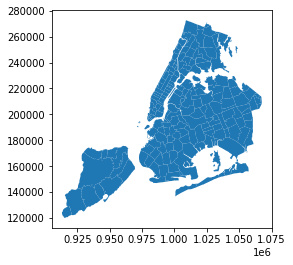

In [4]:
shp.plot()

In [5]:
shp.bounds

,minx,miny,maxx,maxy
0,1.038098e+06,182170.351260,1.043042e+06,189382.856520
1,9.986573e+05,180901.170072,1.005055e+06,187001.649997
2,1.003244e+06,177605.653041,1.012144e+06,185396.346121
3,9.944932e+05,177865.717809,1.000194e+06,183971.173446
4,9.864901e+05,168910.489657,9.940993e+05,179267.727801
...,...,...,...,...
258,9.475908e+05,165428.946751,9.595266e+05,175129.574003
259,1.027490e+06,167153.409838,1.029907e+06,170153.467486
260,9.925510e+05,193592.836946,9.971324e+05,203536.926965
261,9.976419e+05,219560.922148,9.978285e+05,219792.903640


In [275]:
x1 = min(shp.bounds['minx'].values)
x2 = max(shp.bounds['maxx'].values)

y1 = min(shp.bounds['miny'].values)
y2 = max(shp.bounds['maxy'].values)

print(x1, y2)
print(x2, y2)
pt_00 = (y2, x1)
pt_01 = (y2, x2)
pt_10 = (y1, x1)
pt_11 = (y1, x2)

print('pt_00', pt_00)
print('pt_01', pt_01)
print('pt_10', pt_10)
print('pt_11', pt_11)

-74.25559136315213 40.91553277650264
-73.7000090638712 40.91553277650264
pt_00 (40.91553277650264, -74.25559136315213)
pt_01 (40.91553277650264, -73.7000090638712)
pt_10 (40.496133987611806, -74.25559136315213)
pt_11 (40.496133987611806, -73.7000090638712)


<AxesSubplot:>

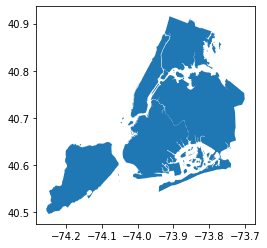

In [276]:
shp.plot()

In [277]:
great_circle(kilometers=great_circle(pt_00, pt_01).km).destination((40.91553277650264, -74.25559136315213), bearing=90)

Point(40.91419963182533, -73.70001746672092, 0.0)

In [278]:
# great_circle(pt_00, pt_10).km
great_circle(pt_00, pt_11).km

66.09101641043473

In [307]:
for col in range(0, round(distance(pt_00, pt_10).km), 2):
    for row in range(0, round(distance(pt_00, pt_01).km), 2):
        _
print(col, row)

46 46


In [309]:
def get_block(p_00):
    p_01 = great_circle(kilometers=2).destination(p_00, bearing=90)
    p_10 = great_circle(kilometers=2).destination(p_00, bearing=180)
    p_11 = great_circle(kilometers=2).destination(p_10, bearing=90)
    return p_00, p_01, p_10, p_11

In [311]:
region_00 = geopy.Point(latitude=pt_00[0], longitude=pt_00[1])

# print(region_00.latitude, region_00.longitude)
c = 0

areas = []
areas_names = []
for col in range(0, round(great_circle(pt_00, pt_10).km), 2):
    for row in range(0, round(great_circle(pt_00, pt_01).km), 2):
        c+=1
        region_00, region_01, region_10, region_11 = get_block(region_00)
        # print(f'Polygon([{region_00.latitude, region_00.longitude}, {region_01.latitude, region_01.longitude}, {region_11.latitude, region_11.longitude}, {region_10.latitude, region_10.longitude}])')
        # add region as area
        area = (f'NYC_{col}{row}', Polygon([(region_00.longitude, region_00.latitude), (region_01.longitude, region_01.latitude), (region_11.longitude, region_11.latitude), (region_10.longitude, region_10.latitude)]))
        areas.append(area)
        # areas_names.append(f'NYC_{col}{row}')
        region_00 = geopy.Point(latitude=region_01.latitude, longitude=region_01.longitude)
    region_00 = great_circle(kilometers=2).destination((region_00.latitude, x1), bearing=180)

# print(areas[100])
# areas[100]
# len(areas)
print(c)
area

576


('NYC_4646', <shapely.geometry.polygon.Polygon at 0x7fb98ca3c250>)

In [312]:
areas[0]

('NYC_00', <shapely.geometry.polygon.Polygon at 0x7fb9931eb310>)

In [313]:
list_polygons = []
for b in shp['geometry'].values:
    for poly in b.geoms:
        list_polygons.append(poly)

In [315]:
counter = 0
saved = []

for area in areas:
    for poly in list_polygons:
        if area[1].intersects(poly): #or area[1].touches(poly) or area[1].within(poly) or area[1].overlaps(poly) or area[1].crosses(poly):
            if area not in saved:
                saved.append(area)

# print(counter)
print(len(saved))

282


In [6]:
district_file_loc = '/Users/ernestvmo/Downloads/ZIP_CODE_040114/ZIP_CODE_040114.shp'

In [7]:
shp_district = gpd.read_file(district_file_loc)

<AxesSubplot:>

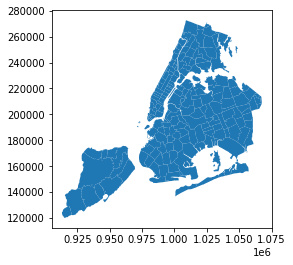

In [8]:
shp_district.plot()

In [9]:
len(shp_district)

263

In [328]:
shp_district.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [331]:
print(shp_district['geometry'].values[0])

POLYGON ((1038098.251871482 188138.3800067157, 1038141.935839221 188154.7877822965, 1038171.28978315 188165.8130227178, 1038280.151770145 188206.7030327916, 1038520.853060395 188296.7665009648, 1038764.226589397 188388.4182205498, 1039008.358318985 188480.262196973, 1039251.8240394 188571.7187069654, 1039504.487904146 188666.2785572112, 1039757.420141056 188761.6589438766, 1039853.95275639 188797.623110801, 1039876.902841732 188806.0961909592, 1039898.156736225 188814.2687467933, 1040001.024312645 188852.7857301384, 1040114.195674226 188895.895552054, 1040244.262015149 188944.6585778892, 1040360.036389887 188988.1483203024, 1040487.856344223 189036.3355598897, 1040731.019571811 189127.6096555442, 1040974.394413143 189218.6832922995, 1041221.44181931 189310.2083717138, 1041374.340135559 189368.7128478885, 1041391.659982815 189376.2292370498, 1041406.932590067 189382.8565203846, 1041423.310510054 189348.2476657182, 1041589.312146559 189067.3023614585, 1041715.325345978 188850.665327549, 

### Taxi Data

In [15]:
taxi_data_root = "/Users/ernestvmo/OneDrive - Universiteit Leiden/Q1/Urban Computing/Project/data/taxi_data/"
taxi_data_locations = ["yellow_tripdata_2012-07.csv", 
                        "yellow_tripdata_2012-08.csv", 
                        "yellow_tripdata_2012-09.csv", 
                        "yellow_tripdata_2012-10.csv", 
                        "yellow_tripdata_2012-11.csv", 
                        "yellow_tripdata_2012-12.csv", 
                        "yellow_tripdata_2013-01.csv", 
                        "yellow_tripdata_2013-02.csv", 
                        "yellow_tripdata_2013-03.csv", 
                        "yellow_tripdata_2013-04.csv", 
                        "yellow_tripdata_2013-05.csv", 
                        "yellow_tripdata_2013-06.csv"]

In [ ]:
for f in taxi_data_locations:
    # load csv
    df_taxi = pd.read_csv(taxi_data_root + f)
    
    # drop unnecessary columns
    df_taxi = df_taxi[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_datetime', 'dropoff_longitude', 'dropoff_latitude']]
    
    # project longitude/latitude to x/y coordinates
    df_taxi['pickup_x_y_coords'] = project_coords(df_taxi[['pickup_longitude', 'pickup_latitude']].values)
    df_taxi['dropoff_x_y_coords'] = project_coords(df_taxi[['dropoff_longitude', 'dropoff_latitude']].values)
    
    # delete rows where x_y_coords = zero
    

In [16]:
df_taxi = pd.read_csv(taxi_data_root + taxi_data_locations[0])

In [95]:
def project_coords(coordinates):
    proj = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:2263", always_xy=True)
    # latitude, longitude = proj.transform(longitude, latitude)
    x_y_projection = []

    for lon, lat in coordinates:
        if lon != 0 and lat != 0:
            x, y = proj.transform(lon, lat)
            x_y_projection.append((x,y))
        else:
            x_y_projection.append((lon, lat))

    return x_y_projection

In [100]:
df_taxi = df_taxi[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_datetime', 'dropoff_longitude', 'dropoff_latitude']]

In [102]:
df_taxi['pickup_x_y_coords'] = project_coords(df_taxi[['pickup_longitude', 'pickup_latitude']].values)
df_taxi['dropoff_x_y_coords'] = project_coords(df_taxi[['dropoff_longitude', 'dropoff_latitude']].values)

In [107]:
df_taxi = df_taxi[df_taxi.pickup_x_y_coords != (0,0)]

In [143]:
df_taxi.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,pickup_x_y_coords,dropoff_x_y_coords
0,2012-07-01 03:32:51,-73.966130,40.761309,2012-07-01 03:44:22,-73.986274,40.722112,"(993632.8647532096, 216643.93698775012)","(988054.6942861767, 202361.70784783058)"
1,2012-07-01 00:00:00,-73.866037,40.834670,2012-07-01 00:05:00,-73.866392,40.832757,"(1021320.3220530733, 243398.43977192868)","(1021223.1493813082, 242701.31390845554)"
2,2012-07-01 03:33:00,-73.981165,40.767080,2012-07-01 03:54:00,-73.840485,40.699652,"(989467.3294474155, 218745.24948518354)","(1028480.6576917275, 194218.8243317324)"
3,2012-07-01 03:32:40,-73.950839,40.785787,2012-07-01 03:56:31,-73.850864,40.875776,"(997863.8612807143, 225564.09807745807)","(1025493.5021441872, 258381.69442031797)"
4,2012-07-01 03:33:15,-73.991608,40.764888,2012-07-01 03:56:08,-73.830373,40.847396,"(986574.675871825, 217946.1818522205)","(1031180.2961538866, 248052.09092505643)"


In [144]:
def assign_zip_code_df(dataframe):
    dataframe['pickup_zipcode'] = None
    dataframe['dropoff_zipcode'] = None

    pickup_zips = []
    dropoff_zips = []

    for index, row in dataframe.iterrows():
        pickup_loc = shapely.geometry.Point(row['pickup_x_y_coords'])
        dropoff_loc = shapely.geometry.Point(row['dropoff_x_y_coords'])

        isPickupAdded, isDropOffAdded = False, False

        for zip in zip_codes_shp[['ZIPCODE', 'geometry']].values:
            if zip[1].contains(pickup_loc) and isPickupAdded is False:
                pickup_zips.append(zip[0])
                isPickupAdded = True   

            if zip[1].contains(dropoff_loc) and isDropOffAdded is False:
                dropoff_zips.append(zip[0])
                isDropOffAdded = True   

            if isPickupAdded and isDropOffAdded:
                break
    return pickup_zips, dropoff_zips

In [145]:
l1, l2 = assign_zip_code_df(df_taxi)

KeyboardInterrupt: 

In [108]:
df_taxi.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,pickup_x_y_coords,dropoff_x_y_coords
0,2012-07-01 03:32:51,-73.966130,40.761309,2012-07-01 03:44:22,-73.986274,40.722112,"(993632.8647532096, 216643.93698775012)","(988054.6942861767, 202361.70784783058)"
1,2012-07-01 00:00:00,-73.866037,40.834670,2012-07-01 00:05:00,-73.866392,40.832757,"(1021320.3220530733, 243398.43977192868)","(1021223.1493813082, 242701.31390845554)"
2,2012-07-01 03:33:00,-73.981165,40.767080,2012-07-01 03:54:00,-73.840485,40.699652,"(989467.3294474155, 218745.24948518354)","(1028480.6576917275, 194218.8243317324)"
3,2012-07-01 03:32:40,-73.950839,40.785787,2012-07-01 03:56:31,-73.850864,40.875776,"(997863.8612807143, 225564.09807745807)","(1025493.5021441872, 258381.69442031797)"
4,2012-07-01 03:33:15,-73.991608,40.764888,2012-07-01 03:56:08,-73.830373,40.847396,"(986574.675871825, 217946.1818522205)","(1031180.2961538866, 248052.09092505643)"
5,2012-07-01 03:33:00,-73.969915,40.797525,2012-07-01 03:34:00,-73.968187,40.800715,"(992579.7903589916, 229838.26656730482)","(993057.8085915954, 231000.66391055068)"
6,2012-07-01 03:34:00,-74.003912,40.742082,2012-07-01 03:36:00,-73.996915,40.739155,"(983165.9621022862, 209637.12999328435)","(985104.908955954, 208570.7218703883)"
8,2012-07-01 03:33:00,-73.997570,40.720637,2012-07-01 03:45:00,-74.004312,40.742327,"(984923.5838388423, 201824.03122715623)","(983055.1241754547, 209726.39648990502)"
9,2012-07-01 00:00:00,-73.996542,40.760025,2012-07-01 00:03:00,-73.989002,40.768525,"(985207.9737997081, 216174.33863792234)","(987296.4000315237, 219271.34123561982)"
10,2012-07-01 03:33:00,-73.950293,40.776340,2012-07-01 03:42:00,-73.976730,40.788518,"(998017.0148570617, 222122.32167877074)","(990693.75766849, 226556.13059187777)"


In [20]:
df_taxi['pickup_datetime']

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14379302,VTS,2012-07-28 19:35:00,2012-07-28 19:49:00,3,1.75,-73.989152,40.742678,1,NaN,-73.986675,40.761750,CRD,8.5,0.0,0.5,1.7,0.0,10.7
14379303,VTS,2012-07-28 04:23:00,2012-07-28 04:31:00,5,2.43,-73.855890,40.751350,1,NaN,-73.869515,40.773292,CSH,7.7,0.5,0.5,0.0,0.0,8.7
14379304,CMT,2012-07-28 13:26:38,2012-07-28 13:39:38,2,1.50,-73.981764,40.765116,1,N,-73.984835,40.747975,CSH,8.5,0.0,0.5,0.0,0.0,9.0
14379305,CMT,2012-07-28 13:27:19,2012-07-28 13:29:07,1,0.40,-73.988704,40.767389,1,N,-73.994511,40.766237,CSH,3.3,0.0,0.5,0.0,0.0,3.8
14379306,CMT,2012-07-28 18:23:03,2012-07-28 18:41:13,1,1.90,-73.963550,40.771552,1,N,-73.988742,40.770938,CSH,10.9,0.0,0.5,0.0,0.0,11.4


In [23]:
def assign_zip(coords):
    for zip in zip_codes:
        

IndentationError: expected an indented block (770424268.py, line 2)

In [21]:
# pickup
for longitude, latitude, _ in zip(df_taxi['pickup_longitude'].values, df_taxi['pickup_latitude'].values, range(10)):
    print(longitude, latitude)
    assign_zipcode(coords=(longitude, latitude))

-73.96613 40.761309
-73.866037 40.83467
-73.981165 40.76708
-73.950839 40.785787
-73.991608 40.764888
-73.969915 40.797525
-74.003912 40.742082
0.0 0.0
-73.99756999999998 40.720637
-73.996542 40.760025
